In [32]:
# python3
#
# PROGRAMMER: Félix Ramón López Martínez
# DATE CREATED: 09/11/2020
# REVISED DATE:
# PURPOSE: This code creates and trains an MLP fully connected network
#          to make predictions about a handwriten digit image type from MNIST dataset.
#          Then, it predicts the probability of an input image to be any from 0 to 9 digits
#
#          More about MNIST dataset (National Institute of Standards and Technology) here:
#          https://en.wikipedia.org/wiki/MNIST_database
#
# This code is an evolution of the code originally developed in the framework of the Module 2, Neural Networks,
# Lesson 7, Deep learning with PyTorch, of the Udacity NanoDegree program Deep Learning
#
##

In [33]:
# Imports python modules
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
import matplotlib.pyplot as plt
import numpy as np

# Plotting in Jupyter Notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [34]:
# Define a transform to normalize the data according to MNIST requirements
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Loading the datasets for the training and validation sets
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
validationset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

#  Defining the training dataloaders
batch_size = 50
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True)
validationloader = torch.utils.data.DataLoader(validationset, batch_size, shuffle=True)

In [35]:
# Building the model: three layers
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [36]:
# TRAINING

# Assigning hyperparameters: epochs and learning rate
epochs = 50
lr = 0.003

# Definition of the error function: negative log likelihood loss
criterion = nn.NLLLoss()

# Definition of the optimizer algorithm: Stochastic gradient descent algorithm
optimizer = optim.SGD(model.parameters(), lr)

# Setting model in training mode
model.train()

training_losses, validation_losses, accuracy_log = [], [], []

    
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Clear the gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(images)
        
        # Backward pass
        loss = criterion(output, labels)
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        # Validation pass
        validation_loss = 0
        accuracy = 0

        # Setting model to evaluation mode
        model.eval()

        # Turn off gradients for validation
        with torch.no_grad():
            for images, labels in validationloader:
                
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)

                # Forward pass
                log_ps = model(images)

                # Validation loss calculation
                validation_loss += criterion(log_ps, labels)

                # Calculating the accuracy during the validation pass
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            # set model back to train mode
            model.train()

            training_losses.append(running_loss / len(trainloader))
            validation_losses.append(validation_loss.item() / len(validationloader))
            accuracy_log.append(accuracy / len(validationloader) * 100)

            # Print out the validation accuracy
            print('Epoch: {}/{}.. '.format(e+1, epochs),
                  'Training Loss: {:.3f}.. '.format(running_loss / len(trainloader)),
                  'Validation Loss: {:.3f}.. '.format(validation_loss.item() / len(validationloader)),
                  'Validation Accuracy: {:.1f}%'.format(accuracy / len(validationloader) * 100))
        
        #print(f"Training loss: {running_loss/len(trainloader)}")

Epoch: 1/100..  Training Loss: 1.699..  Validation Loss: 0.921..  Validation Accuracy: 79.6%
Epoch: 2/100..  Training Loss: 0.657..  Validation Loss: 0.486..  Validation Accuracy: 87.0%
Epoch: 3/100..  Training Loss: 0.447..  Validation Loss: 0.390..  Validation Accuracy: 89.1%
Epoch: 4/100..  Training Loss: 0.384..  Validation Loss: 0.350..  Validation Accuracy: 89.8%
Epoch: 5/100..  Training Loss: 0.352..  Validation Loss: 0.325..  Validation Accuracy: 90.6%
Epoch: 6/100..  Training Loss: 0.330..  Validation Loss: 0.309..  Validation Accuracy: 90.9%
Epoch: 7/100..  Training Loss: 0.315..  Validation Loss: 0.299..  Validation Accuracy: 91.1%
Epoch: 8/100..  Training Loss: 0.301..  Validation Loss: 0.286..  Validation Accuracy: 91.8%
Epoch: 9/100..  Training Loss: 0.290..  Validation Loss: 0.276..  Validation Accuracy: 91.8%
Epoch: 10/100..  Training Loss: 0.280..  Validation Loss: 0.268..  Validation Accuracy: 92.2%
Epoch: 11/100..  Training Loss: 0.271..  Validation Loss: 0.261..  Va

Epoch: 89/100..  Training Loss: 0.051..  Validation Loss: 0.089..  Validation Accuracy: 97.3%
Epoch: 90/100..  Training Loss: 0.050..  Validation Loss: 0.088..  Validation Accuracy: 97.2%
Epoch: 91/100..  Training Loss: 0.050..  Validation Loss: 0.086..  Validation Accuracy: 97.4%
Epoch: 92/100..  Training Loss: 0.049..  Validation Loss: 0.087..  Validation Accuracy: 97.4%
Epoch: 93/100..  Training Loss: 0.048..  Validation Loss: 0.088..  Validation Accuracy: 97.3%
Epoch: 94/100..  Training Loss: 0.047..  Validation Loss: 0.086..  Validation Accuracy: 97.3%
Epoch: 95/100..  Training Loss: 0.047..  Validation Loss: 0.085..  Validation Accuracy: 97.4%
Epoch: 96/100..  Training Loss: 0.046..  Validation Loss: 0.085..  Validation Accuracy: 97.4%
Epoch: 97/100..  Training Loss: 0.045..  Validation Loss: 0.085..  Validation Accuracy: 97.2%
Epoch: 98/100..  Training Loss: 0.045..  Validation Loss: 0.084..  Validation Accuracy: 97.3%
Epoch: 99/100..  Training Loss: 0.044..  Validation Loss: 0.

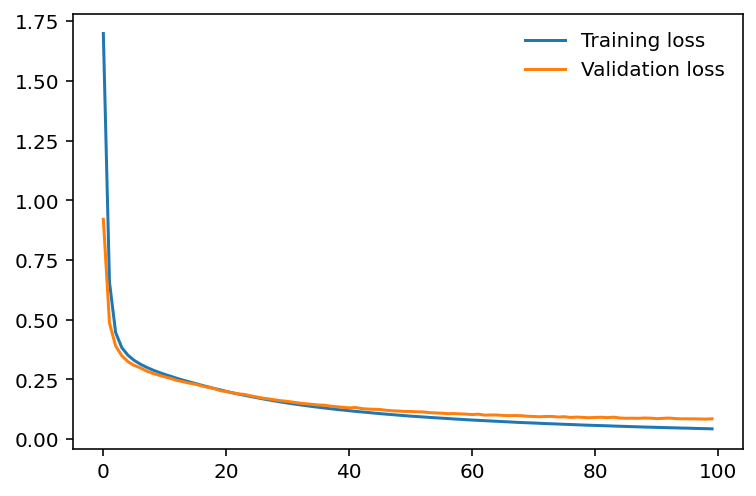

In [37]:
# Plotting trainning and validation losses
plt.plot(training_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend(frameon=False);

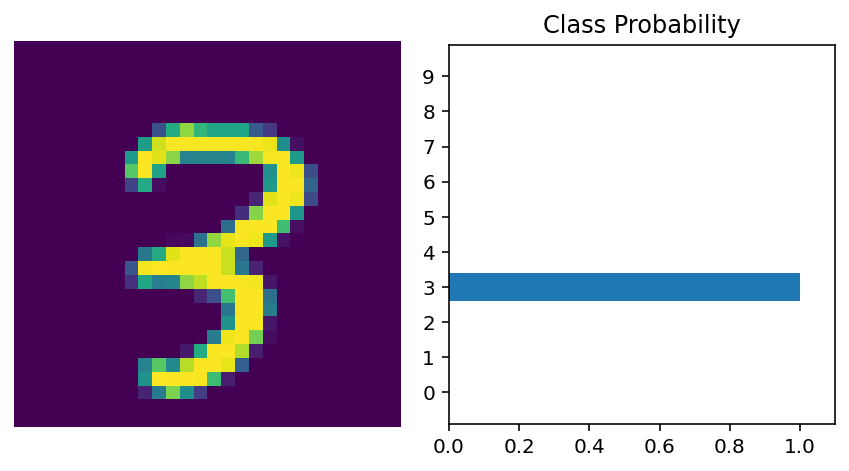

In [46]:
# Making predictions

image, label = next(iter(trainloader))
img = image[0].view(1, 784)

# Turn off gradients for prediction
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, we need to take exponential for probabilities
ps = torch.exp(logps)

ps = ps.data.numpy().squeeze()

# Plotting
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)

ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')

ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()
